# Task 2 (Car Price Prediction With Machine Learning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [9]:
# analysis of data by grouping fuel types
fuel_gb = df.groupby('Fuel_Type').mean()
fuel_gb

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Fuel_Type,,,,,
CNG,2013.000000,3.100000,6.415000,42749.000000,0.000000
Diesel,2014.000000,10.278500,15.814500,50369.916667,0.016667
Petrol,2013.539749,3.264184,5.583556,33528.937238,0.050209


In [10]:
# analysis of data by grouping selling type
sell_gb = df.groupby('Selling_type').mean()
sell_gb

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Selling_type,,,,,
Dealer,2013.712821,6.721692,10.886308,39850.133333,0.020513
Individual,2013.471698,0.870943,1.635283,31606.915094,0.084906


In [11]:
# analysis of data by grouping transmission
trans_gb = df.groupby('Transmission').mean()
trans_gb

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Transmission,,,,,
Automatic,2013.625000,9.420000,15.315500,53062.975000,0.075000
Manual,2013.628352,3.931992,6.450383,34477.356322,0.038314


In [12]:
# total number of unique cars
df['Car_Name'].nunique()

98

## Data Preprocessing 1

Drop 'Car Name' columns beacuse
1. That column has object data type.
2. We can't label encode it, because it has much more number of unique data (car name).

In [13]:
df = df.drop('Car_Name',axis=1)

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory Data Analysis

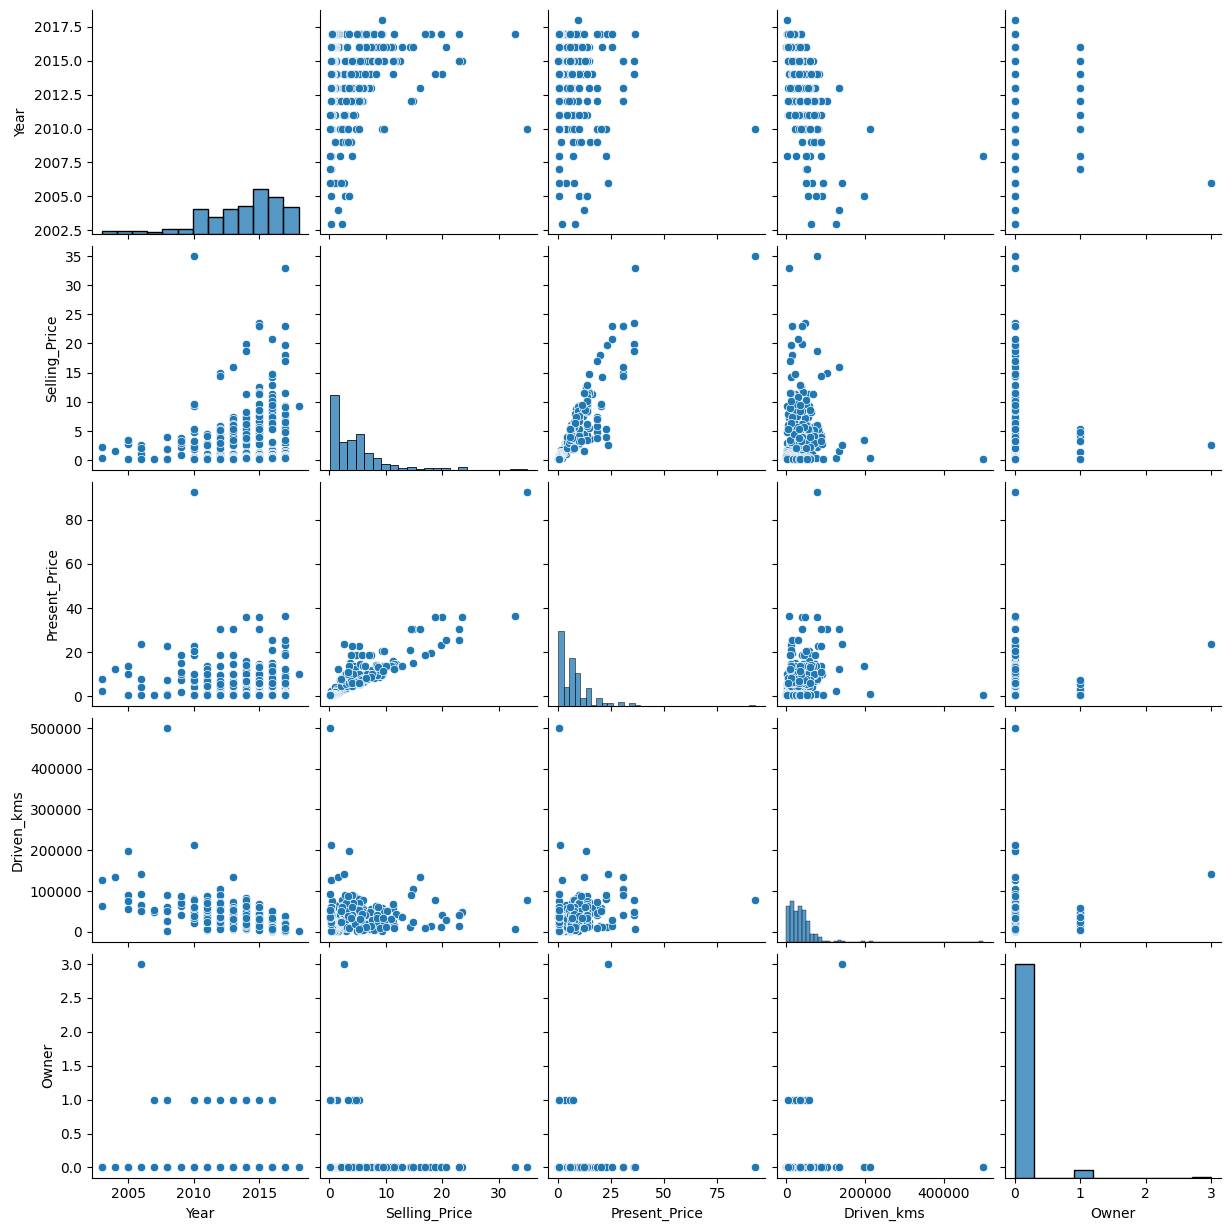

In [15]:
sns.pairplot(df)

Text(0.5, 0.98, 'Feature Distribution')

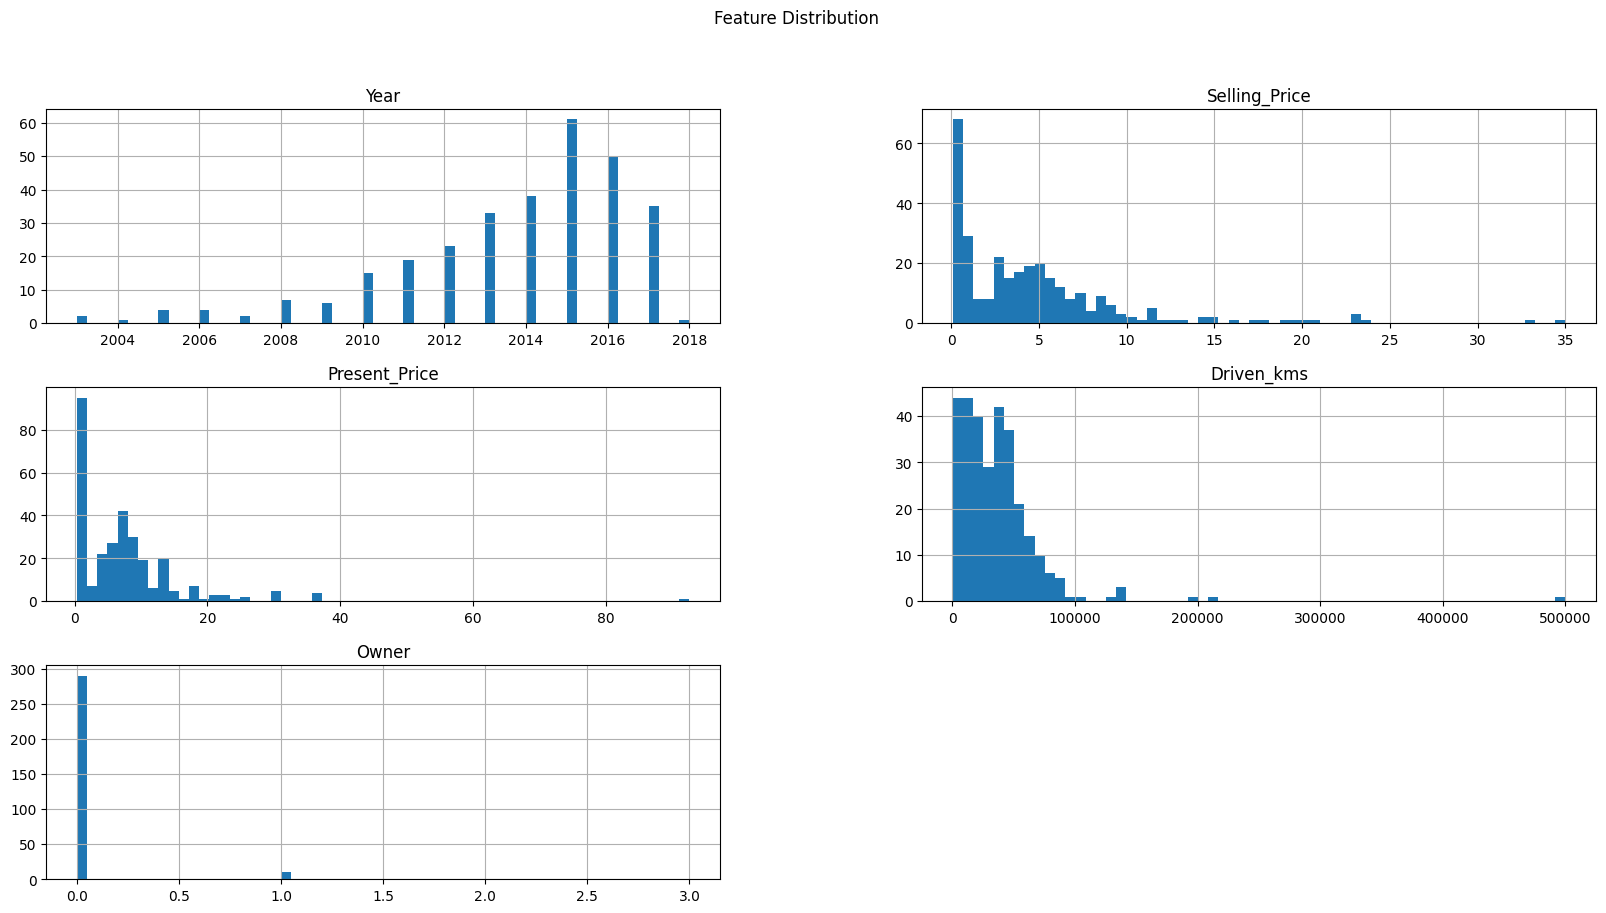

In [16]:
df.hist(bins=60,figsize=(20,10))
plt.suptitle('Feature Distribution')

Text(0.5, 0.98, 'Feature Distribution using Boxplot')

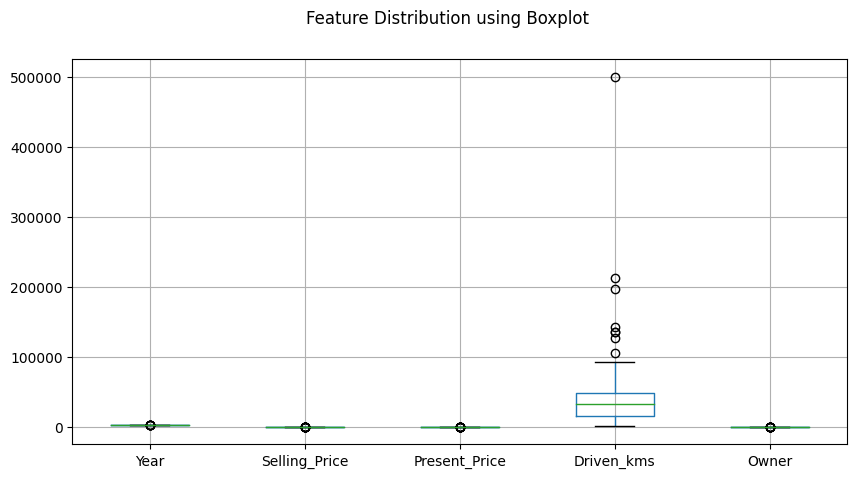

In [17]:
df.boxplot(figsize=(10,5))
plt.suptitle('Feature Distribution using Boxplot')

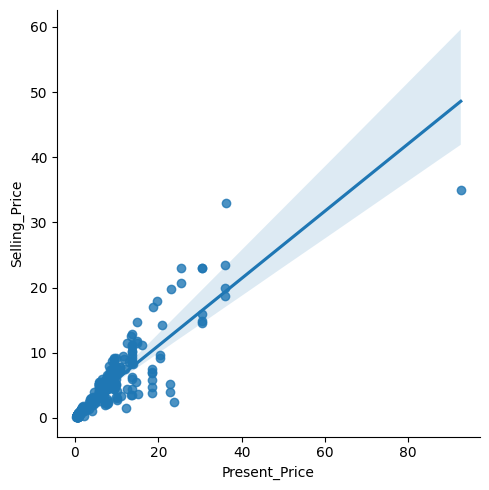

In [18]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=df)

([<matplotlib.patches.Wedge at 0x7c7027055330>,
 [Text(-0.8776154230777207, 0.6631675272328356, 'Petrol'),
  Text(0.8635820276996969, -0.6813413839141726, 'Diesel'),
  Text(1.0997603522251278, -0.022960132265800064, 'CNG')],
 [Text(-0.4786993216787566, 0.36172774212700115, '79%'),
  Text(0.47104474238165284, -0.371640754862276, '20%'),
  Text(0.5998692830318878, -0.012523708508618217, '1%')])

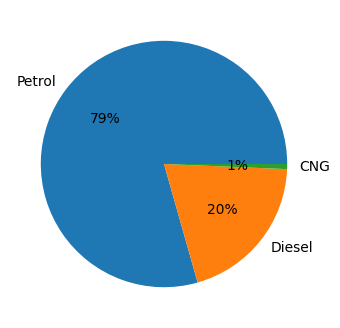

In [19]:
fuel_types = ['Petrol','Diesel','CNG']

fuel_data = pd.Series(df['Fuel_Type']).value_counts()

plt.figure(figsize=(4,4))

plt.pie(fuel_data,labels=fuel_types,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7c702712c460>,
 [Text(-1.0055216878866322, 0.44601136217547, 'Manual'),
  Text(1.0055217087659298, -0.4460113151036022, 'Automatic')],
 [Text(-0.5484663752108903, 0.24327892482298358, '87%'),
  Text(0.548466386599598, -0.24327889914741935, '13%')])

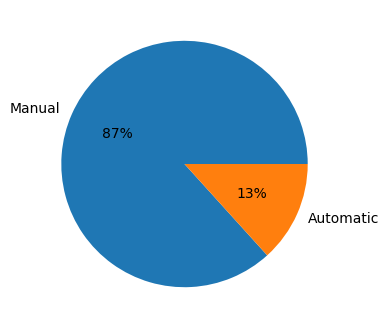

In [20]:
transmission = ['Manual','Automatic']

trans_data = pd.Series(df['Transmission']).value_counts()

plt.figure(figsize=(4,4))

plt.pie(trans_data,labels=transmission,autopct='%.0f%%')

Text(0.5, 1.0, 'Correlation (Without Label Encoder of Features)')

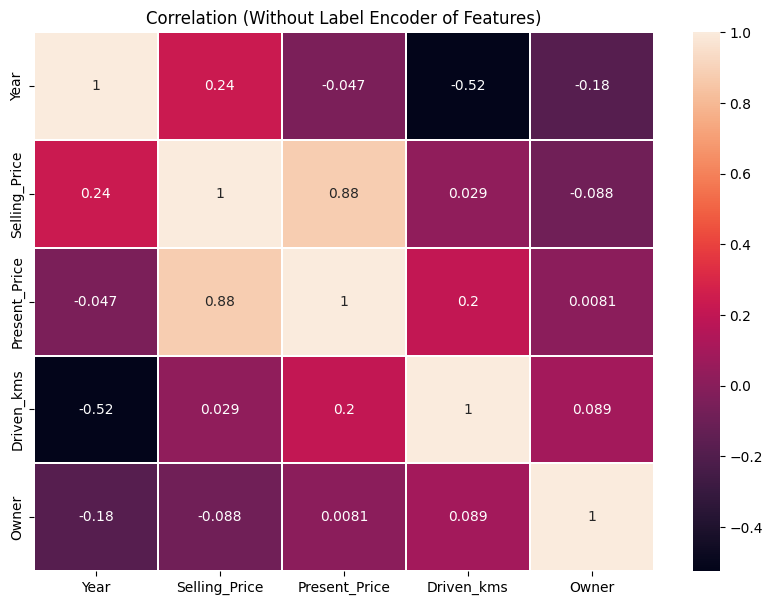

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='white')
plt.title('Correlation (Without Label Encoder of Features)')

## Data Preprocessing (Label Encoding)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [23]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


## Heatmap

Text(0.5, 1.0, 'Correlation (After Label Encoder of Features)')

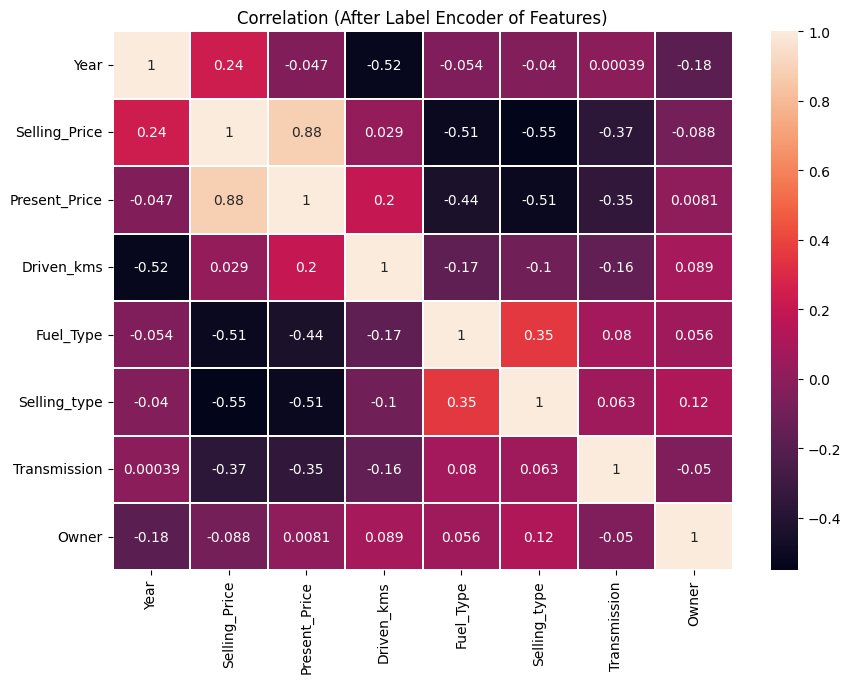

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='white')
plt.title('Correlation (After Label Encoder of Features)')

Text(0.5, 1.0, 'Correlation Plot of All Features')

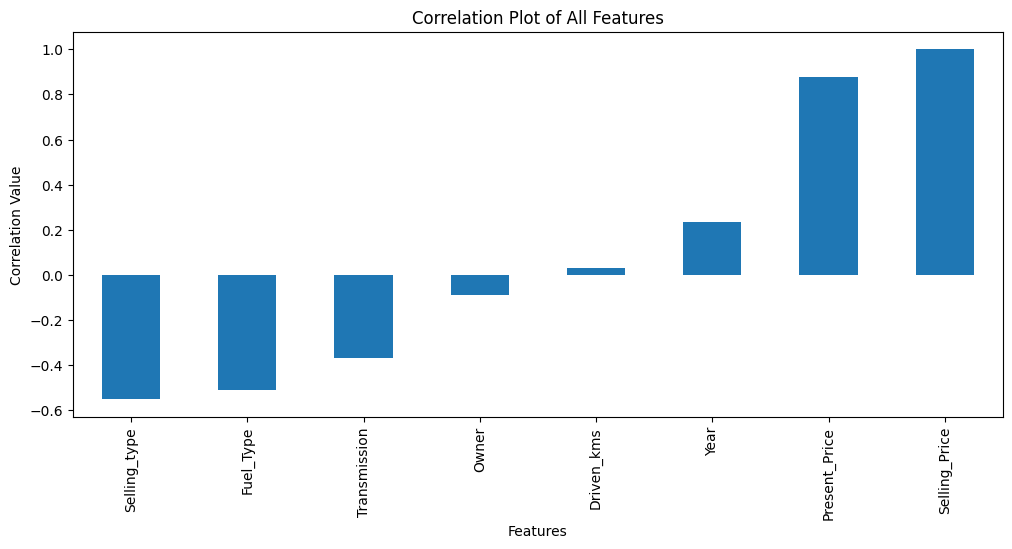

In [25]:
plt.figure(figsize=(12,5))

df.corr()['Selling_Price'].sort_values().plot(kind='bar')

plt.xlabel('Features')

plt.ylabel('Correlation Value')

plt.title('Correlation Plot of All Features')

## Machine Learning

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [27]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 7), (91, 7), (210,), (91,))

### Linear Regression

In [30]:
lr = LinearRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

print(f'MSE of Linear Regression: {mean_squared_error(y_test,lr_pred):.2f}')

MSE of Linear Regression: 3.50


### Decision Tree

In [31]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)

print(f'MSE of Decision Tree: {mean_squared_error(y_test,dtree_pred):.2f}')

MSE of Decision Tree: 1.84


### Random Forest

In [32]:
rfr = DecisionTreeRegressor()

rfr.fit(X_train,y_train)

rfr_pred = rfr.predict(X_test)

print(f'MSE of Random Forest: {mean_squared_error(y_test,rfr_pred):.2f}')

MSE of Random Forest: 1.72


Let's work with Random Forest because it gives minimum MSE

In [40]:
differ = pd.DataFrame({'Actual Price':y_test,'Prediction Price':rfr_pred,'Difference':(y_test - rfr_pred)})
differ

,Actual Price,Prediction Price,Difference
177,0.35,0.50,-0.15
289,10.11,11.25,-1.14
228,4.95,5.20,-0.25
198,0.15,0.16,-0.01
60,6.95,7.05,-0.10
...,...,...,...
119,1.05,1.15,-0.10
19,2.65,2.25,0.40
181,0.30,0.50,-0.20
79,14.50,14.90,-0.40


Text(0, 0.5, 'Y Pred (Predicted Value)')

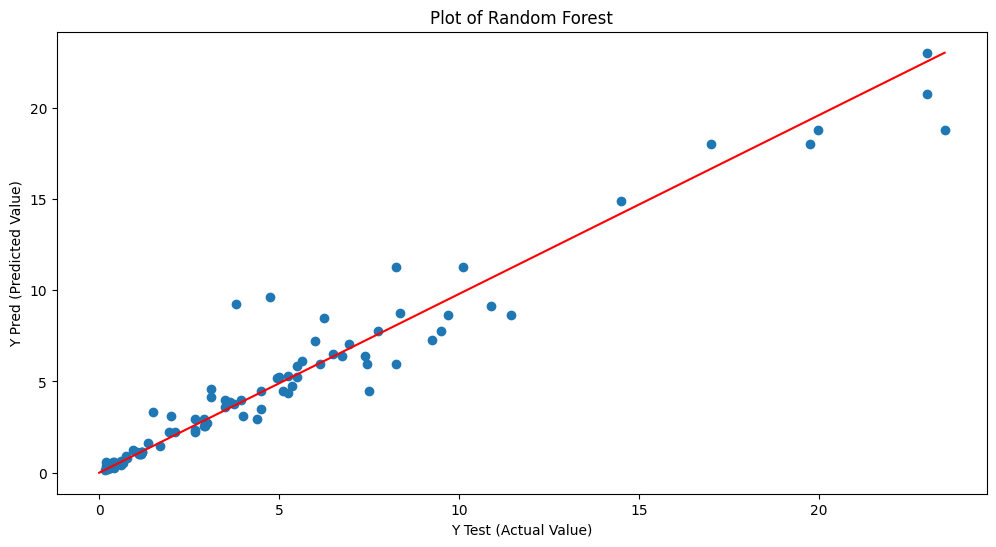

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,rfr_pred)
plt.plot([0,max(y_test)],[0,max(rfr_pred)],color='r')
plt.title('Plot of Random Forest')
plt.xlabel('Y Test (Actual Value)')
plt.ylabel('Y Pred (Predicted Value)')

Text(0.5, 1.0, 'Distribution of Difference between Actual and Predicted')

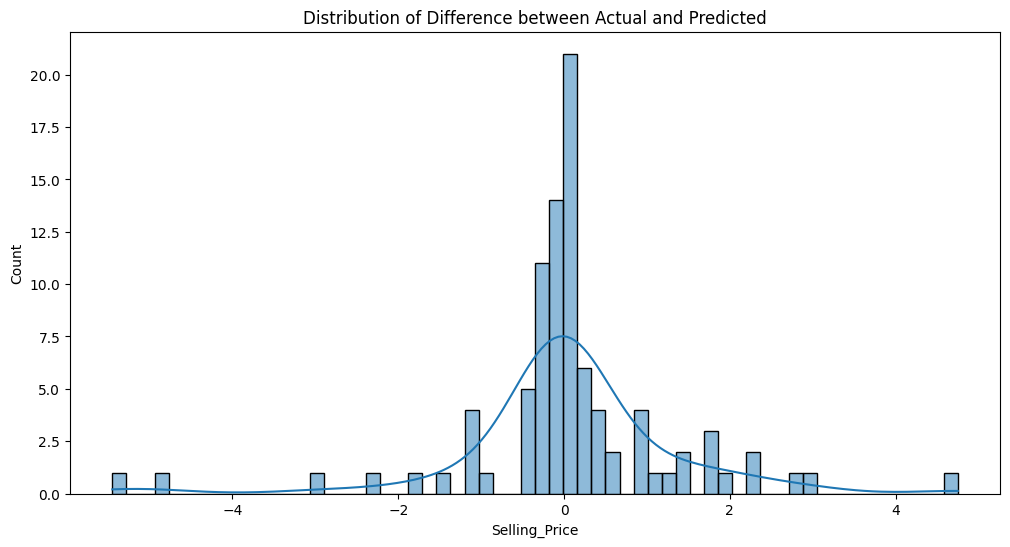

In [41]:
plt.figure(figsize=(12,6))
sns.histplot((y_test - rfr_pred),bins=60,kde=True)
plt.title('Distribution of Difference between Actual and Predicted')

### Model Evaluation

In [48]:
print(f'MSE of Model: {mean_squared_error(y_test,rfr_pred):.2f}')
print(f'MAE of Model: {mean_absolute_error(y_test,rfr_pred):.2f}')
print(f'RMSE of Model: {np.sqrt(mean_squared_error(y_test,rfr_pred)):.2f}')
print('\nVariance Score: ',r2_score(y_test,rfr_pred))

MSE of Model: 1.72
MAE of Model: 0.74
RMSE of Model: 1.31

Variance Score:  0.939518644713431


In [50]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficent'])
coeff_df

,Coefficent
Year,0.368784
Present_Price,0.428967
Driven_kms,-0.000004
Fuel_Type,-1.448173
Selling_type,-1.132522
Transmission,-1.442827
Owner,-1.048704


In [51]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


### Model Prediction

In [52]:
rfr.predict([[2016,5.79,8000,2,0,1,0]])

array([4.8])

According to model, if:
1. year = 2016
2. present price = 5.79 (5.79L)
3. Driven Kms = 8000
4. Fuel Type = Petrol
5. Selling Type = Dealer
6. Transmission = Manual
7. Owner = 0

Then, Selling Price = 4.8L